## Signal processing with Python for Neuroscience, short way to start use EEG in life

##### This chapter will explore the most widely used tools for visualizing electroencephalography (EEG) data. 

##### EEG is a technique that measures the electrical activity of the brain using electrodes placed on the scalp. 
##### Visualizing this complex data is crucial for researchers and clinicians to identify patterns, detect abnormalities, and gain insights into brain function.

## Install libraries

In [62]:
!pip install mne --quiet

## Import libraries
To install libraries in Python, you can use a package manager like pip, which comes pre-installed with most Python distributions.



In [63]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from scipy import signal
import mne

## Import Dataset

Data collected from [PiEEG](https://pieeg.com/pieeg/) device that allow read EEG via RaspberryPi signle board computer.
Channel labels according to the international 10-20 system EEG Placement:
For EEG electrodes
* Ch1 - Fp1  
* Ch2 - Fp2
* Ch3 - T3  
* Ch4 - C3  
* Ch5 - Cz  
* Ch6 - C4     
* Ch7 - O1  
* Ch8 - O2   
and 2 clips electrodes (references and bias electrode)
* A1
* A2

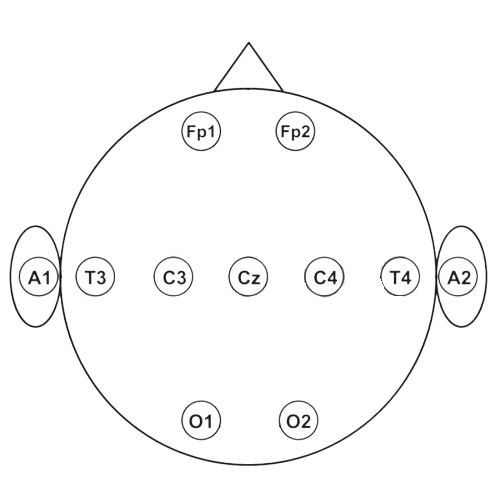

## 🧠 Converting EEG Data from ADC to Microvolts

1. EEG sensors record tiny electrical signals from the brain.
2. These signals are analogue, meaning they change continuously over time — just like a smooth wave.
3. To work with this values, we need to convert that analogue wave into digital values and get the proper number. This is done by a special chip called an ADC (Analog-to-Digital Converter) — for example, the ADS1299.


## Sampling the analogue signal

4. The ADC takes samples of the continuous EEG signal many times per second (e.g. 250 Hz = 250 samples every second).
5. Each sample represents the instant voltage measured between an electrode and a reference point on the body.

So instead of a smooth line, we get a series of discrete points:

Time:   t1   t2   t3   t4   ...
Signal: V1   V2   V3   V4   ...

## Converting each sample to a number

6. Each measured voltage is converted into a 24-bit digital value.
7. Because 24 bits can represent 2²⁴ = 16,777,216 possible numbers, the ADC produces values between 0 and 16,777,215 (or –8,388,608 to +8,388,607 if signed).
8. These numbers are proportional to the real voltage, but they don’t have physical units yet.

| True voltage (V) | ADC output (24-bit integer) |
| ---------------: | --------------------------: |
|           –4.5 V |                           0 |
|              0 V |                   8,388,608 |
|           +4.5 V |                  16,777,215 |


## Normalising the data

To convert these integers back to voltage, we first “normalise” them — that means dividing by the maximum possible ADC value so they fall within –1 … +1.

### What “normalisation” means when converting EEG data to microvolts

When the EEG device records data, the ADC (Analog-to-Digital Converter) gives you big integer numbers — for example, from –8,388,608 to +8,388,607 for a 24-bit chip. These numbers are proportional to the real voltage, but they’re not yet in volts or microvolts.

*Normalisation means scaling those raw numbers so they fall between –1 and +1*.
This step makes the data independent of the ADC’s range.

By scaling it properly, we can interpret it as brain activity in microvolts, visualise it as waves, and analyse it correctly.

In [64]:
# load the Excel file as a DataFrame
eeg_data = pd.read_excel("/kaggle/input/dataset-with-channels-for-eeg-visualization/dataset.xlsx")

# convert from Digital Value of Analog Digital converter (ADC) ADS1299 to microvolts

"""
converts raw EEG data from a 24-bit ADC (ranging from 0 to 16777215) into microvolts by normalizing the data,
scaling it to a 4.5V reference voltage, and converting to microvolts, then rounding to two decimal places. 
This transformation is necessary for accurately interpreting EEG signals, which are typically measured in microvolts
"""

eeg_data = round(1000000*4.5*(eeg_data/16777216),2) # 2 to the power of 24 = 16777216
display(eeg_data.head())

,ch1,ch2,ch3,ch4,ch5,ch6,ch7,ch8
0,6410.24,791.55,9774.56,10304.67,3329.94,1008.38,8315.22,14155.44
1,6415.23,817.54,9780.35,10284.74,3338.84,999.47,8323.54,14007.41
2,6433.25,844.41,9796.80,10461.31,3358.23,965.94,8342.53,14262.67
3,6441.81,853.83,9803.88,10622.30,3365.77,931.53,8350.57,14621.96
4,6426.65,821.02,9788.67,10529.52,3346.22,952.10,8331.45,14570.11


## Libraries for Visualisation

- The simplest libraries for data visualization are Matplotlib and Seaborn.
- These general-purpose Python libraries are also frequently used for creating custom visualizations of EEG data due to their flexibility and ease of use.   

In this plot:

### *1. X-axis (horizontal) →*

- Represents the sample number (Sample).
- Each point on the X-axis corresponds to a measurement taken by the EEG acquisition system at a specific moment in time.
- For example, if the EEG was sampled at 250 Hz, that means there are 250 samples per second, so x = 1000 would correspond to roughly 4 seconds.


### *2. Y-axis (vertical) →*

- Represents the EEG amplitude in microvolts (µV).
- It shows the voltage value recorded from that EEG channel (ch1) at each moment in time.


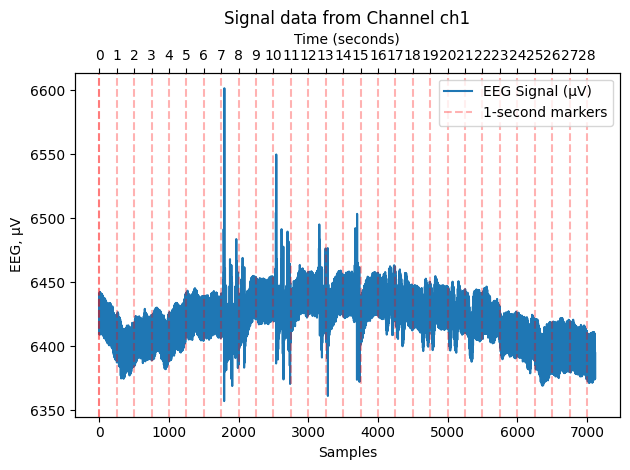

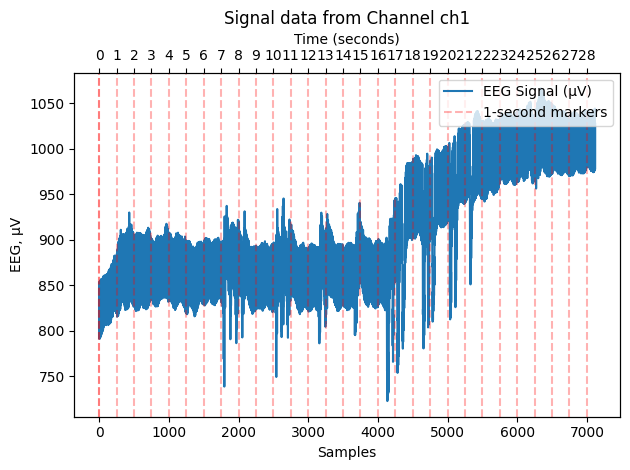

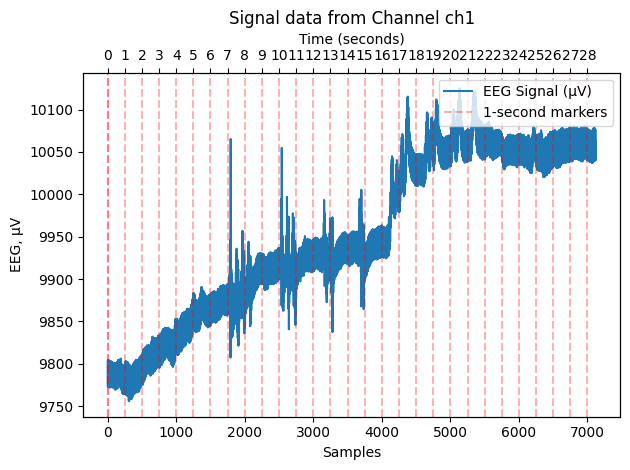

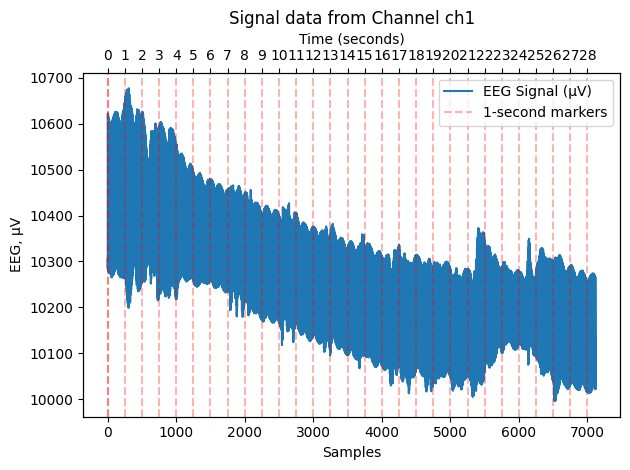

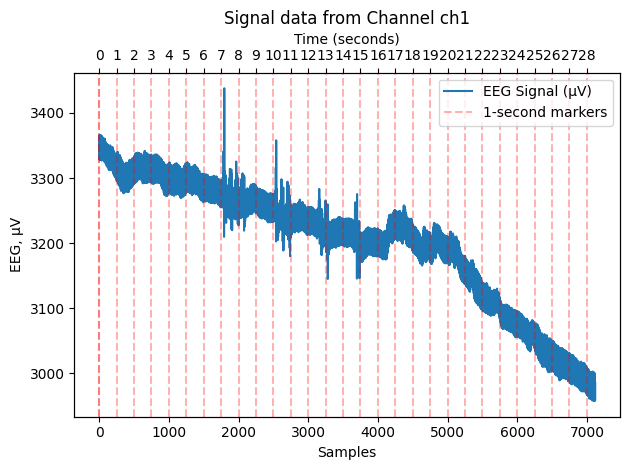

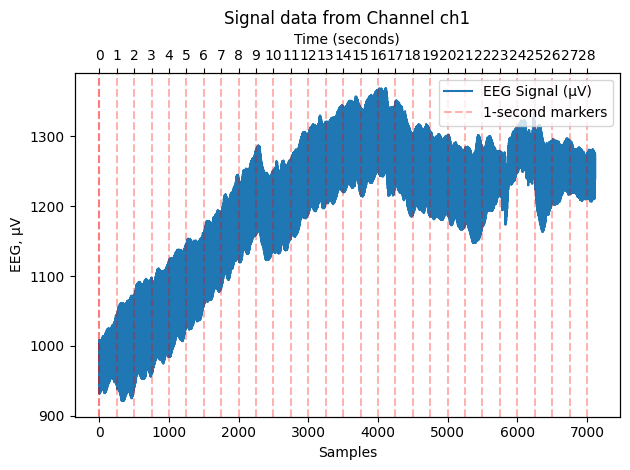

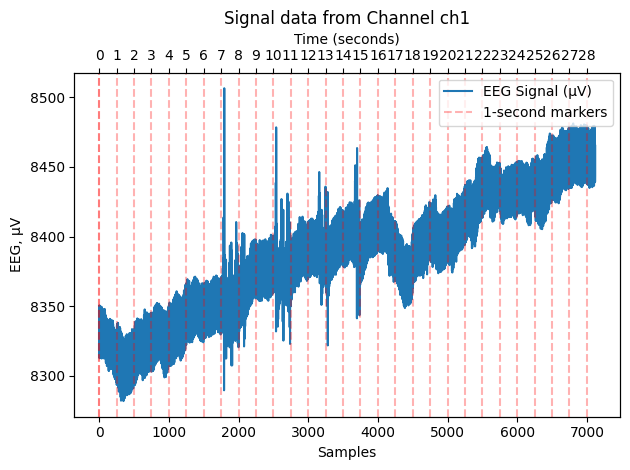

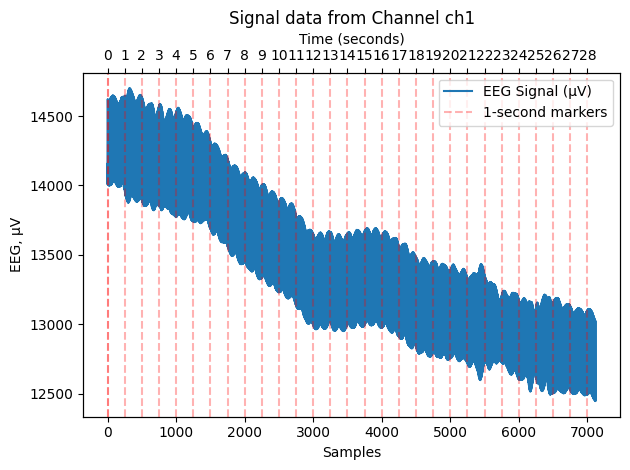

In [65]:
for channel in eeg_data:
    eeg_signal  = eeg_data[channel]
    fig, ax1 = plt.subplots()
    
    # Plot EEG signal
    ax1.plot(eeg_signal, 
             label='EEG Signal (µV)')
    ax1.set_xlabel('Samples')
    ax1.set_ylabel('EEG, µV')
    ax1.set_title('Signal data from Channel ch1')
    
    # Secondary X Axis (seconds)
    ax2 = ax1.twiny()
    num_samples = len(eeg_signal)
    sec_ticks = range(0, num_samples + 1, 250)  # 1 second = 250 samples
    ax2.set_xlim(ax1.get_xlim())
    ax2.set_xticks(sec_ticks)
    ax2.set_xticklabels([f"{x/fps:.0f}" for x in sec_ticks])
    ax2.set_xlabel('Time (seconds)')

    # Vertical lines for the 250 samples (1 s)
    for x in sec_ticks:
        ax1.axvline(x=x, color='red', linestyle='--', alpha=0.3, label='_nolegend_')
    
    ax1.axvline(x=0, color='red', linestyle='--', alpha=0.3, label='1-second markers')
    
    ax1.legend(loc='upper right')
    plt.tight_layout()
    plt.show()

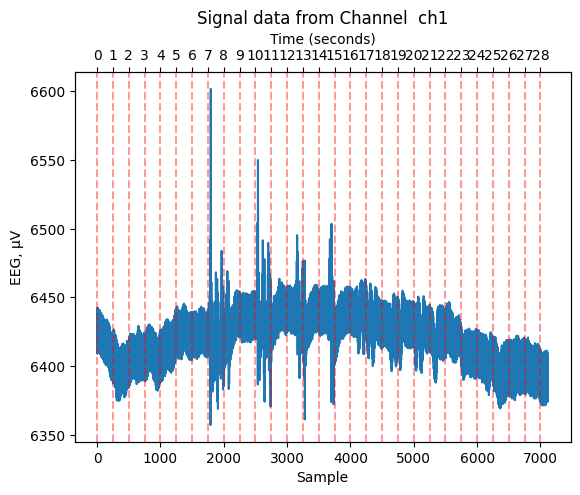

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


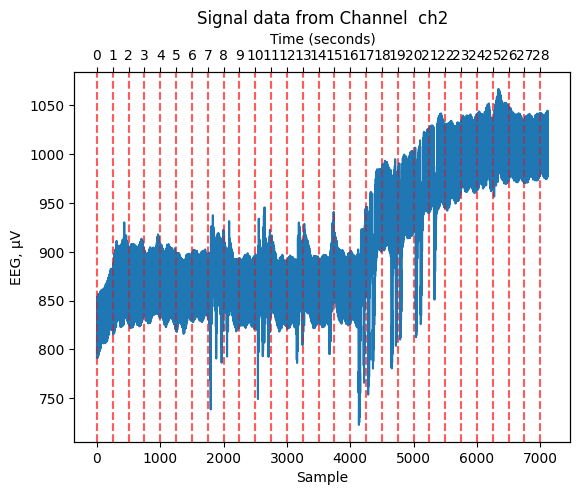

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


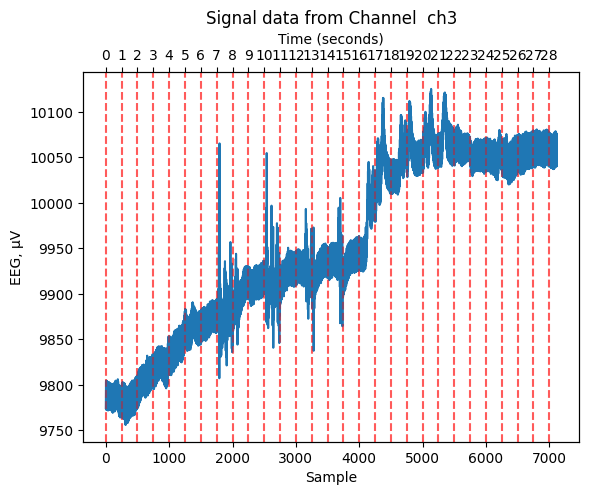

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


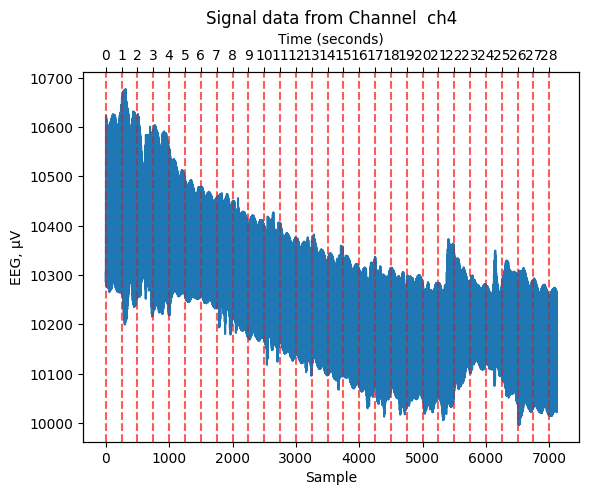

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


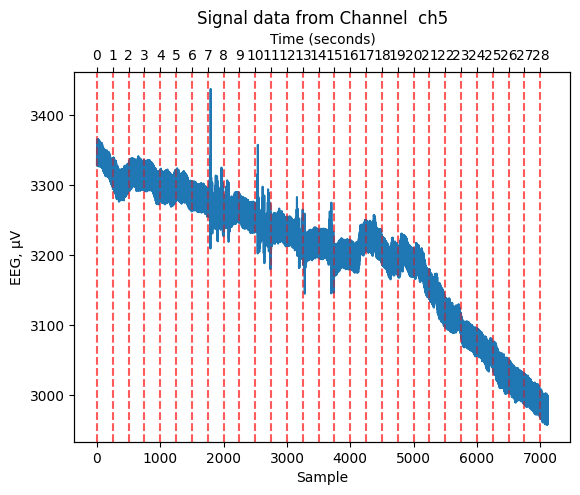

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


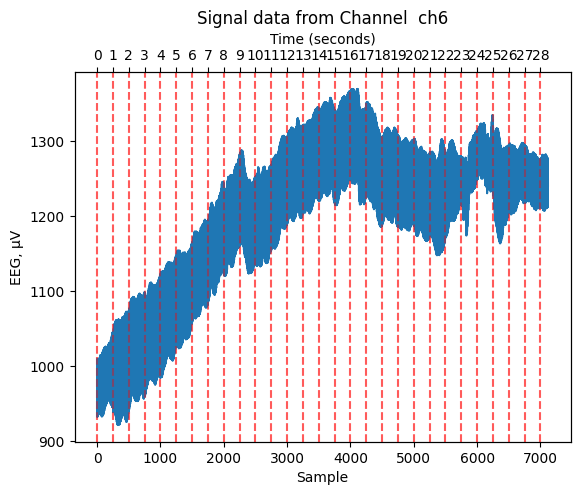

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


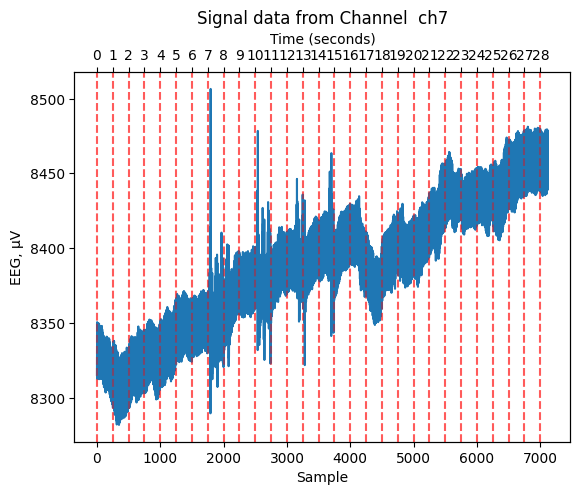

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


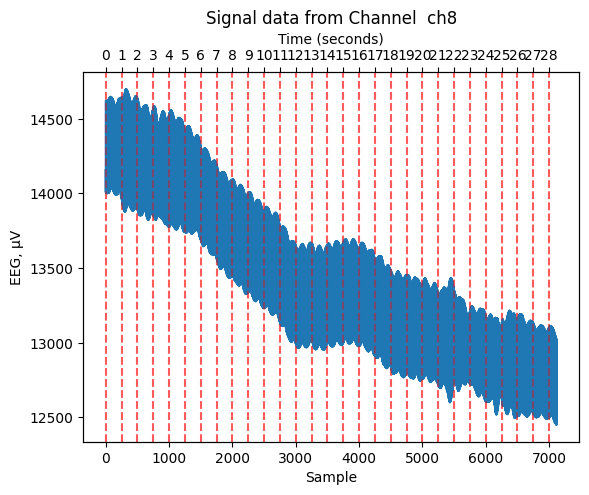

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


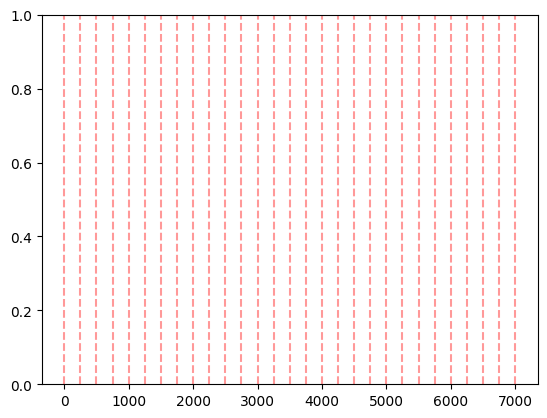

In [56]:
# We can plot all the channels within subplots and also a line every sample...

for channel in eeg_data:
    display_data = eeg_data[channel]
    plt.plot(display_data)
    plt.title("Signal data from Channel " + channel)
    plt.ylabel('EEG, µV')
    plt.xlabel('Sample')
    
    ax1 = plt.gca()  # main Axis(samples)
    ax2 = ax1.twiny()  # secundary X-axis on top
    num_samples = len(display_data)
    num_seconds = num_samples / 250

    
    ax2.set_xlim(ax1.get_xlim())  # Align both axis
    sec_ticks = range(0, num_samples, 250)  # 1 line per second
    ax2.set_xticks(sec_ticks)
    ax2.set_xticklabels([f"{x/fps:.0f}" for x in sec_ticks])
    ax2.set_xlabel("Time (seconds)")
    

    for line in range(0, len(display_data), 250):
        plt.axvline(x=line, color='red', linestyle='--', alpha=0.4)
    
    plt.show()
    ax1.legend(loc='upper right')


    # Líneas verticales cada 250 samples (1 s)
    for x in sec_ticks:
        plt.axvline(x=x, color='red', linestyle='--', alpha=0.4)

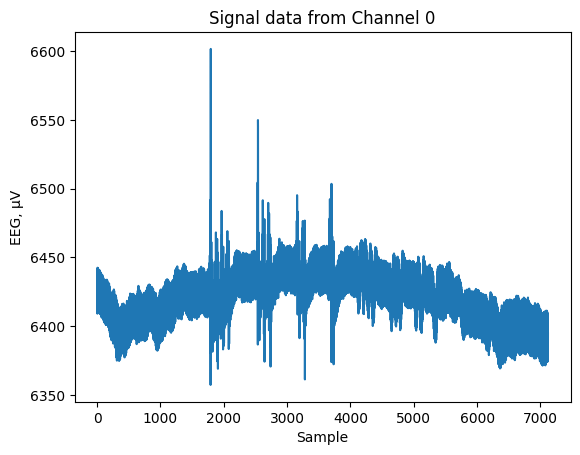

In [70]:
# Or we can select the data from one of the channels
first_channel = 0
first_channel_data = eeg_data.iloc[:, first_channel]

plt.plot(first_channel_data)
plt.title("Signal data from Channel " + str(channel))
plt.ylabel('EEG, µV')
plt.xlabel('Sample')
plt.show()

## Band Pass Filter

- Band-pass filtering ***is a common signal processing technique*** used in EEG (Electroencephalography) data analysis **to isolate specific frequency bands of interest while removing unwanted frequencies.**

- Band-pass filtering allows researchers to focus on particular brainwave rhythms that are relevant to their study. For example, you might want to extract the alpha, beta, or gamma waves from the EEG data.  

You can read more about band-pass filter in [Chapter 1](https://graceful-kelpie-579688.netlify.app/chapters/chapter_1-band_pass_filter).


### High Pass Filter

- A high-pass filter lets frequencies higher than the cutoff pass through and attenuates lower ones.
- With cutoff_high = 1 Hz, the filter blocks everything below 1 Hz and lets 1 Hz and above pass.
- It’s useful to remove slow drifts in the signal (for example, baseline trends in EEG).

### Low Pass Filter

- A low-pass filter lets frequencies lower than the cutoff pass and attenuates higher ones.
- With cutoff_low = 10 Hz, the filter passes everything up to 10 Hz and blocks what’s above.
- It’s useful to remove high-frequency noise.


| Filter    | Cutoff  | Passes     |
| --------- | ------- | ---------- |
| High-pass | 1 Hz    | > 1 Hz     |
| Low-pass  | 10 Hz   | < 10 Hz    |
| Band-pass | 1–10 Hz | 1 to 10 Hz |


In [84]:
## Butterworth high-pass filter

def butter_highpass_filter(data, cutoff, nyq, order=5):
    """Butterworth high-pass filter.
    Args:
        data (array_like): data to be filtered.
        cutoff (float): cutoff frequency.
        order (int): order of the filter.
    Returns:
        array: filtered data."""
    normal_cutoff = cutoff / nyq  # normalized cutoff frequency
    b, a = signal.butter(order, normal_cutoff, btype='high', analog=False)
    filtered_data = signal.filtfilt(b, a, data)
    return filtered_data


## Butterworth low-pass filter

def butter_lowpass_filter(data, cutoff, nyq, order=5):
    """Butterworth low-pass filter.
    Args:
        data (array_like): data to be filtered.
        cutoff (float): cutoff frequency.
        order (int): order of the filter.
    Returns:
        array: filtered data."""
    normal_cutoff = cutoff / nyq  # normalized cutoff frequency
    b, a = signal.butter(order, normal_cutoff, btype='low', analog=False)
    filtered_data = signal.lfilter(b, a, data)
    return filtered_data

- `channel_data_bp_filtered = channel_data.copy()`  
  Creates a copy of the data so the original `channel_data` is not modified.

- `fps = 250`  
  Sets the sampling frequency of the signal to 250 Hz.

- `cutoff_high = 1`  
  Defines the cutoff frequency for the high-pass filter (removes frequencies below 1 Hz).

- `cutoff_low = 10`  
  Defines the cutoff frequency for the low-pass filter (removes frequencies above 10 Hz).

- `nyq = 0.5 * fps`  
  Calculates the Nyquist frequency, which is half of the sampling frequency (needed for filtering).


#### Setting new configs...

In [89]:
# copy the dataframe to prevent using the original data and to also modify the copy dataframe
channel_data_filtered = first_channel_data.copy()

# sampling frequency
fps = 250  

# cutoff frequency of the high-pass filter
cutoff_high = 1  

# cutoff frequency of the low-pass filter
cutoff_low = 55

# Nyquist frequency (half of the sampling frequency)
nyq = 0.5 * fps 

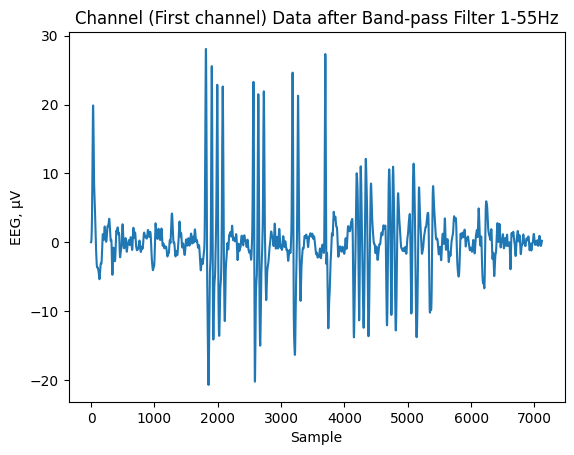

In [90]:
# apply the band-pass filter
# High
channel_data_filtered = butter_highpass_filter(
    data=channel_data_bp_filtered,
    cutoff=cutoff_high,
    nyq=nyq,
    order=5)

# Low
channel_data_filtered = butter_lowpass_filter(
    data=channel_data_bp_filtered,
    cutoff=cutoff_low,
    nyq=nyq,
    order=4)


plt.plot(channel_data_bp_filtered)
plt.title("Channel (First channel) Data after Band-pass Filter " + str(cutoff_high)+"-"+ str(cutoff_low)+"Hz")
plt.ylabel('EEG, µV')
plt.xlabel('Sample')
plt.show()

In [91]:
# Band Pass Filter filter the whole dataset
# Here we convert ALL the EEG data after filtering to Pandas format dataset

eeg_data_filtered = eeg_data.copy()

for channel in range(eeg_data.shape[1]):
    eeg_data_filtered.iloc[:, channel] = butter_highpass_filter(
        data=eeg_data.iloc[:, channel],
        cutoff=cutoff_high,
        nyq=nyq,
        order=5)
    eeg_data_filtered.iloc[:, channel] = butter_lowpass_filter(
        data=eeg_data_filtered.iloc[:, channel],
        cutoff=cutoff_low,
        nyq=nyq,
        order=4)
    
display(eeg_data_filtered.head())

,ch1,ch2,ch3,ch4,ch5,ch6,ch7,ch8
0,0.386225,0.604226,0.392510,3.747266,0.451607,-0.805173,0.424356,6.037578
1,2.403860,4.886998,2.489683,19.016790,3.005347,-4.909098,2.819805,23.409480
2,7.730533,18.152872,7.996011,51.555841,9.999207,-15.294329,9.419839,41.747894
3,17.402944,41.059413,17.560289,118.282697,22.157782,-34.548829,21.081414,93.146986
4,28.486943,61.661388,27.757672,229.675468,34.538215,-60.455692,33.259958,256.512824


## Heat map

#### Spatial and Temporal Context: 
- It provides a comprehensive view of how signals from different channels vary over time, enhancing the understanding of the spatial and temporal dynamics of brain activity.

#### Inter-channel Relationships: 
- Visualizing data in 3D can highlight correlations and interactions between different EEG channels

#### Detailed Analysis: 
- For datasets with multiple channels, 3D plots can help in identifying patterns, trends, and anomalies across all channels simultaneously, offering a more detailed analysis.

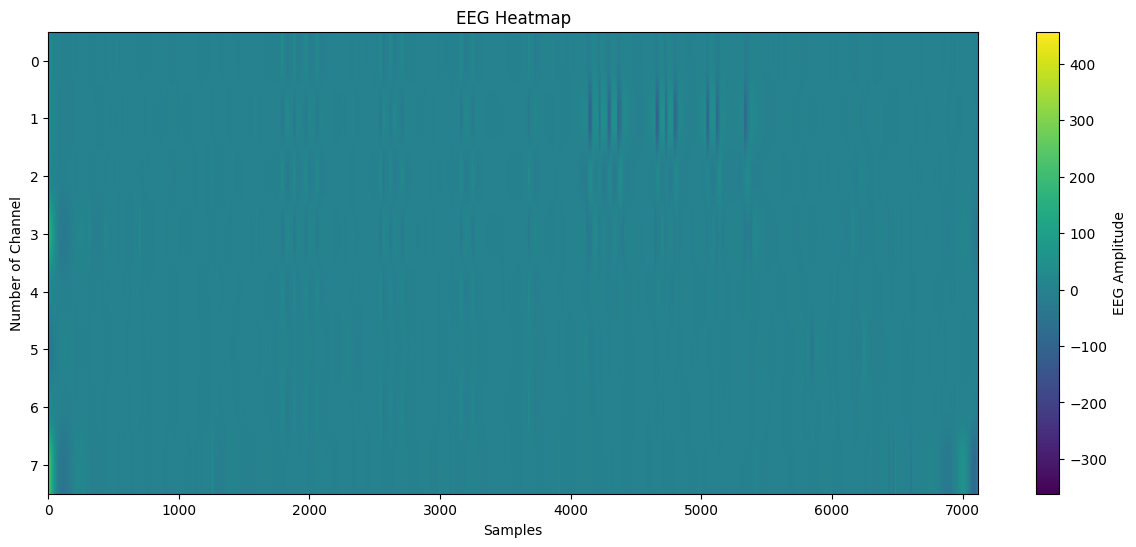

In [92]:
# create the heatmap
"""
This script is essential for EEG data processing because it visualizes the filtered EEG signals across 
multiple channels over time, allowing for an intuitive assessment of brain activity patterns.
By using a heatmap, it highlights variations in EEG amplitude, making it easier to identify significant 
changes and patterns that may indicate neural events or artifacts.
This visualization aids in the quick identification of relevant features and anomalies in the EEG data, 
facilitating more effective analysis and interpretation.

- The graphs clearly show moments with chewing and blinking artifacts.
"""

plt.figure(figsize=(15, 6))

heatmap = plt.imshow(eeg_data_filtered.T, 
                     cmap='viridis', 
                     aspect='auto')

plt.colorbar(heatmap, label='EEG Amplitude')
plt.xlabel('Samples')
plt.ylabel('Number of Channel')
plt.title('EEG Heatmap')
plt.show()

## 3D graph

3D visualization of EEG data is essential for several reasons:  

1. **Enhanced Data Comprehension:** It allows researchers to better understand complex spatial and temporal relationships within the data, providing a clearer overview of how different channels interact over time.

2. **Pattern Recognition**: It aids in identifying patterns and anomalies across multiple channels that might be missed in 2D representations, improving diagnostic accuracy and insight.

3. **Interactive Exploration**: It facilitates interactive exploration, enabling users to rotate and zoom into specific regions of interest, enhancing data analysis and interpretation.

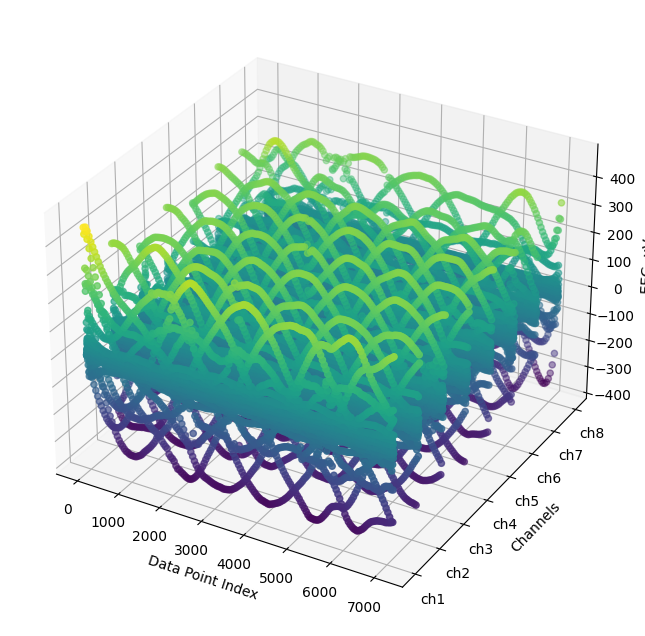

In [124]:
channel_names = ["ch1", "ch2", "ch3", "ch4", "ch5", "ch6", "ch7", "ch8"]
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(111, projection='3d')
x, y = np.meshgrid(np.arange(channel_data_bp_filtered.shape[0]), 
                   np.arange(len(channel_names)))

z = eeg_data_filtered.values.flatten()
ax.scatter(x, 
           y, 
           z, 
           c=z, 
           cmap='viridis', 
           marker='o')

ax.set_xlabel('Data Point Index')
ax.set_ylabel('Channels')
ax.set_zlabel('EEG, µV')

ax.set_yticks(np.arange(len(channel_names)))
ax.set_yticklabels(channel_names)

plt.show()

## Correlation matrix

***Correlation matrices helps reveal functional connectivity patterns between different brain regions as measured by EEG electrodes.***

- This allows researchers to understand how different parts of the brain interact and communicate during various cognitive tasks or states.   
- EEG data typically involves many channels, which can lead to high-dimensional datasets. Correlation matrices can be used as input for techniques like Principal Component Analysis (PCA) or Independent Component Analysis (ICA) to reduce dimensionality while retaining important information

- The colors in the matrix represent the strength and direction of correlations between each pair of EEG channels. Typically, warmer colors (reds) indicate strong positive correlations, cooler colors (blues) indicate strong negative correlations, and neutral colors (whites or greens) indicate weak or no correlation.


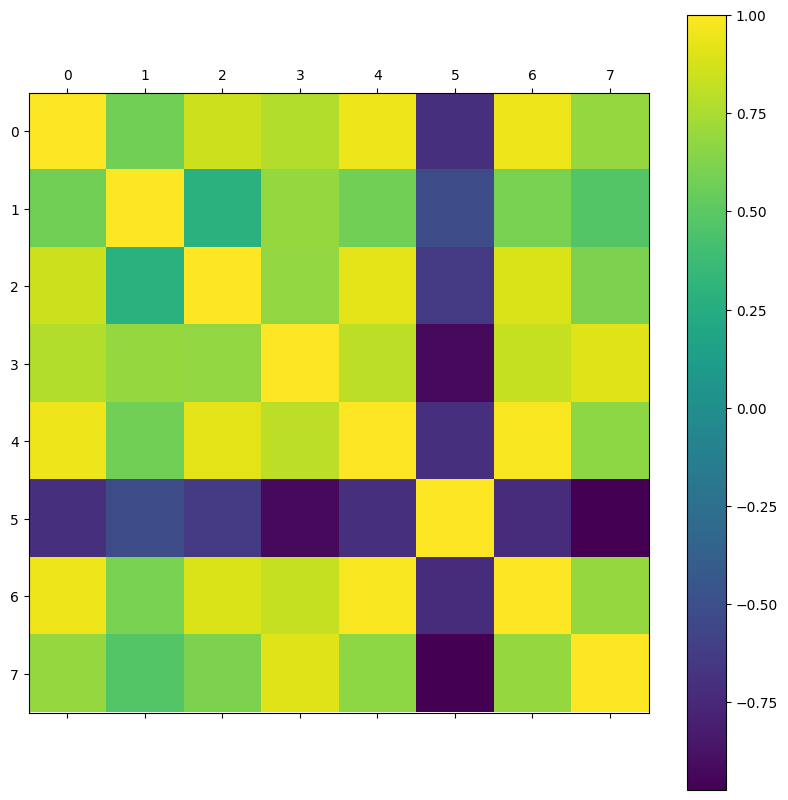

In [155]:
plt.figure(figsize=(10, 10))
plt.matshow(eeg_data_filtered.corr(), fignum=1)
plt.colorbar()
plt.show()

## MNE library

- The [MNE](https://mne.tools/dev/auto_tutorials/intro/10_overview.html) library is a comprehensive open-source toolkit designed for processing, analyzing, and visualizing electrophysiological data such as EEG and MEG. It provides robust tools for data preprocessing, artifact removal, and advanced statistical analysis. Its capabilities include 2D and 3D visualizations, facilitating a deeper understanding of complex brain dynamics.

**In this script we will convert our dataset to MNE library format**

In [163]:
data_after_band_pass_filter = np.array(eeg_data_filtered)
data_after_band_pass_filter = data_after_band_pass_filter.reshape((8, 7120))
data_after_band_pass_filter = pd.DataFrame(data_after_band_pass_filter)

# Creates a standard EEG electrode montage using the alphabetical naming system (Fp1, Fz, Cz, etc.).
# The “montage” indicates the physical locations of the electrodes on the head, which is important for visualizations and certain analyses.
standard_montage = mne.channels.make_standard_montage('standard_alphabetic') 
n_channels = 8

# MNE info object -> This object is important to tell MNE how to interpretate our data 
# Its "fake" because in this case we re not using data from different essays, its just the data we have from the .xlsx file
fake_info = mne.create_info(
    ch_names=["Fp1", "Fz", "Cz", "Pz", "T3", "C3", "C4", "T4"],
    sfreq=250.,
    ch_types='eeg')

print (fake_info, 'fake_info')

# This function creates an Evoked object from the provided data. 
# An Evoked object is used to represent averaged data from multiple trials

fake_evoked = mne.EvokedArray(data_after_band_pass_filter, fake_info) 
fake_evoked.set_montage(standard_montage, on_missing='ignore')

<Info | 7 non-empty values
 bads: []
 ch_names: Fp1, Fz, Cz, Pz, T3, C3, C4, T4
 chs: 8 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 125.0 Hz
 meas_date: unspecified
 nchan: 8
 projs: []
 sfreq: 250.0 Hz
> fake_info


<Evoked | '' (average, N=1), 0 – 28.476 s, baseline off, 8 ch, ~460 KiB>

## Spatial distribution of brain activity over the scalp

- The EEG script using `times_to_plot` and `fake_evoked.plot_topomap` is essential for visualizing the spatial distribution of brain activity over the scalp at specific time points. The `times_to_plot` array defines the time intervals (0, 7, 14, 21, 28 milliseconds) at which the topographical maps will be plotted. 
- By using fake_evoked.plot_topomap with these parameters, you can observe how the EEG signal changes across different scalp locations and time intervals, providing insights into the temporal dynamics of neural activity. 
- This is particularly useful for identifying patterns and understanding the progression of brain responses over time.

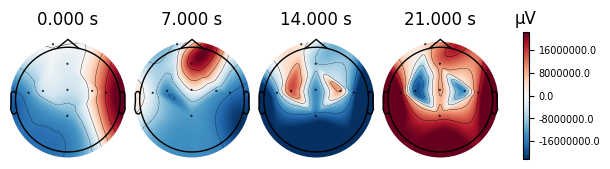

In [161]:
times_to_plot = np.arange(0, 28., 7) # This creates an array of time points: [0, 7, 14, 21]
fake_evoked.plot_topomap(times_to_plot, 
                         ch_type="eeg", 
                         ncols=len(times_to_plot), 
                         nrows="auto"); #This method creates topographic maps of the EEG data